<a href="https://colab.research.google.com/github/andresca94/Capstone-Project-Deep-Learning/blob/main/CapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Installations
#Speech Recognition
!pip install pytube
!pip install git+https://github.com/openai/whisper.git -q
#Translation, Summarization and Text Generation
!pip install evaluate
!pip install transformers sentencepiece datasets
!pip install rouge_score
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 KB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 86.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 105.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 19.3 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    

In [2]:
#Imports
#Speech Recognition
import pytube
import whisper
#Translation, Summarization and Text Generation
from datasets import load_dataset
from datasets import concatenate_datasets, DatasetDict
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import nltk
import evaluate
import os
from torch import optim
from torch.nn import functional as F
from transformers import AdamW, AutoModelForSeq2SeqLM, AutoTokenizer
from transformers import get_linear_schedule_with_warmup
from transformers import pipeline
from tqdm import tqdm_notebook

sns.set()

#Model: Wishper OpenAI Speech Recognition

In [3]:
# Reading the above Taken movie Youtube link
video = 'https://www.youtube.com/watch?v=8Ms3mJFkSeg'
data = pytube.YouTube(video)
# Converting and downloading as 'MP4' file
audio = data.streams.get_audio_only()
path = audio.download()#Get file from return of the method

##Get the lyrics

In [4]:
model = whisper.load_model('large')
text = model.transcribe(path)
#printing the transcribe
text['text']

100%|█████████████████████████████████████| 2.87G/2.87G [00:45<00:00, 67.7MiB/s]


" ♪♪ ♪♪ ♪♪ ♪ I get lost in your eyes. ♪ And I feel my spirits rise and soar like the wind. ♪ Is it love that I am in? ♪ I get weak in a glance. ♪ Isn't this what's called romance? ♪ I know, I know. ♪ Cause when I'm lost, I can't let go. ♪ I don't mind not knowing what I'm headed for. ♪ I look to the skies. ♪ It's like being lost in heaven when I'm lost in your eyes. ♪ I just fell. ♪ Don't know why. ♪ Is there a way we can deny? ♪ When I first knew was when I first looked at you. ♪ And if I can't find my way, it's salvation six worlds away. ♪ I'll be found when I'm lost in your eyes. ♪ I don't mind not knowing what I'm headed for. ♪ You can take me to the skies. ♪ It's like being lost in heaven when I'm lost in your eyes. ♪ I get the leak in the glass. ♪ Isn't this what's come from me? ♪ I'll be found when I'm lost in your eyes. ♪ Ooh."

In [16]:
text_output = text['text'].replace('♪','').strip()
print(text_output)
#text_output = """One month after the United States began what has become a troubled rollout of a national COVID vaccination campaign, the effort is finally gathering real steam.
#Close to a million doses -- over 951,000, to be more exact -- made their way into the arms of Americans in the past 24 hours, the U.S. Centers for Disease Control and Prevention reported Wednesday. That's the largest number of shots given in one day since the rollout began and a big jump from the previous day, when just under 340,000 doses were given, CBS News reported.
#That number is likely to jump quickly after the federal government on Tuesday gave states the OK to vaccinate anyone over 65 and said it would release all the doses of vaccine it has available for distribution. Meanwhile, a number of states have now opened mass vaccination sites in an effort to get larger numbers of people inoculated, CBS News reported."""

I get lost in your eyes.  And I feel my spirits rise and soar like the wind.  Is it love that I am in?  I get weak in a glance.  Isn't this what's called romance?  I know, I know.  Cause when I'm lost, I can't let go.  I don't mind not knowing what I'm headed for.  I look to the skies.  It's like being lost in heaven when I'm lost in your eyes.  I just fell.  Don't know why.  Is there a way we can deny?  When I first knew was when I first looked at you.  And if I can't find my way, it's salvation six worlds away.  I'll be found when I'm lost in your eyes.  I don't mind not knowing what I'm headed for.  You can take me to the skies.  It's like being lost in heaven when I'm lost in your eyes.  I get the leak in the glass.  Isn't this what's come from me?  I'll be found when I'm lost in your eyes.  Ooh.


# Model: mt5 Translation
Attention Based Model.


##Machine Translation
If the audio language is Spanish we would like to translate into English for the next Promt Engineering, for this task I´m gonna fine tunning mT5 using the opus-en-es books dataset.

In [18]:
model_repo = 'google/mt5-small'

In [19]:
tokenizer = AutoTokenizer.from_pretrained(model_repo)

Downloading:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/553 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

In [122]:
# Model description: https://huggingface.co/google/mt5-base
model = AutoModelForSeq2SeqLM.from_pretrained(model_repo)
model = model.cuda()
#max_seq_len = model.config.max_length
max_seq_len = 1024

In [123]:
input_sent = 'Here is our test sentence!'
token_ids = tokenizer.encode(input_sent, return_tensors='pt').cuda()
token_ids

model_out = model.generate(token_ids)
print(model_out)

output_text = tokenizer.convert_tokens_to_string(
    tokenizer.convert_ids_to_tokens(model_out[0]))
print(output_text)

tensor([[     0, 250099,      1]], device='cuda:0')
<pad> <extra_id_0></s>


## Steps
1. Load the pretrained model and tokenizer
2. Load in the dataset
3. Transform the dataset into input
4. Train/finetune the model on our dataset
5. Test the model

In [124]:
example_input_str = '<jp>This is a test nbuig.'
input_ids = tokenizer.encode(example_input_str, return_tensors='pt')
print('Input IDs:', input_ids)

tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
print('Tokens:', tokens)

Input IDs: tensor([[ 1042,  3889,   669, 13673,   339,   259,   262,  2978,   259,   272,
          1982,  1315,   260,     1]])
Tokens: ['▁<', 'jp', '>', 'This', '▁is', '▁', 'a', '▁test', '▁', 'n', 'bu', 'ig', '.', '</s>']


In [ ]:
# sorted(tokenizer.vocab.items(), key=lambda x: x[1])

In [96]:
# Source: https://huggingface.co/datasets/alt
dataset = load_dataset("opus_books", "en-es")

  0%|          | 0/1 [00:00<?, ?it/s]

REVISAR OVERFITTING, DE CUANTOS DATA ERA EL DATASET DEL EJEMPLO?

In [98]:
datasets_train_test = dataset["train"].train_test_split()
datasets_train_validation = datasets_train_test["train"].train_test_split()

dataset["train"] = datasets_train_validation["train"]
dataset["validation"] = datasets_train_validation["test"]
dataset["test"] = datasets_train_test["test"]

In [99]:
datasets_train_test

DatasetDict({
    train: Dataset({
        features: ['id', 'translation'],
        num_rows: 70102
    })
    test: Dataset({
        features: ['id', 'translation'],
        num_rows: 23368
    })
})

In [100]:
dataset.remove_columns('id')

DatasetDict({
    train: Dataset({
        features: ['translation'],
        num_rows: 52576
    })
    validation: Dataset({
        features: ['translation'],
        num_rows: 17526
    })
    test: Dataset({
        features: ['translation'],
        num_rows: 23368
    })
})

In [101]:
train_dataset = dataset['train'].remove_columns('id')
test_dataset = dataset['test'].remove_columns('id')

In [102]:
train_dataset[20]

{'translation': {'en': 'She might as well have said to the fire, "don\'t burn!" but how could she divine the morbid suffering to which I was a prey?',
  'es': 'Era como si hubiese dicho al fuego: «No quemes». Pero ¿cómo podía ella adivinar mi sufrimiento?'}}

In [103]:
LANG_TOKEN_MAPPING = {
    'en': '<en>',
    'es': '<es>'
}

In [125]:
special_tokens_dict = {'additional_special_tokens': list(LANG_TOKEN_MAPPING.values())}
tokenizer.add_special_tokens(special_tokens_dict)
model.resize_token_embeddings(len(tokenizer))

Embedding(250102, 512)

In [126]:
token_ids = tokenizer.encode(
    example_input_str, return_tensors='pt',
    padding='max_length',
    truncation=True, max_length=max_seq_len)
print(token_ids)

tensor([[1042, 3889,  669,  ...,    0,    0,    0]])


In [127]:
def encode_input_str(text, target_lang, tokenizer, seq_len,
                     lang_token_map=LANG_TOKEN_MAPPING):
  target_lang_token = lang_token_map[target_lang]

  # Tokenize and add special tokens
  input_ids = tokenizer.encode(
      text = target_lang_token + text,
      return_tensors = 'pt',
      padding = 'max_length',
      truncation = True,
      max_length = seq_len)

  return input_ids[0]
  
def encode_target_str(text, tokenizer, seq_len,
                      lang_token_map=LANG_TOKEN_MAPPING):
  token_ids = tokenizer.encode(
      text = text,
      return_tensors = 'pt',
      padding = 'max_length',
      truncation = True,
      max_length = seq_len)
  
  return token_ids[0]

def format_translation_data(translations, lang_token_map,
                            tokenizer, seq_len=128):
  # Choose a random 2 languages for in i/o
  langs = list(lang_token_map.keys())
  input_lang, target_lang = np.random.choice(langs, size=2, replace=False)
  #input_lang, target_lang = langs

  # Get the translations for the batch
  input_text = translations[input_lang]
  target_text = translations[target_lang]

  if input_text is None or target_text is None:
    return None

  input_token_ids = encode_input_str(
      input_text, target_lang, tokenizer, seq_len, lang_token_map)
  
  target_token_ids = encode_target_str(
      target_text, tokenizer, seq_len, lang_token_map)

  return input_token_ids, target_token_ids

def transform_batch(batch, lang_token_map, tokenizer):
  inputs = []
  targets = []
  for translation_set in batch['translation']:
    formatted_data = format_translation_data(
        translation_set, lang_token_map, tokenizer, max_seq_len)
    
    if formatted_data is None:
      continue

    input_ids, target_ids = formatted_data
    inputs.append(input_ids.unsqueeze(0))
    targets.append(target_ids.unsqueeze(0))
    
  batch_input_ids = torch.cat(inputs).cuda()
  batch_target_ids = torch.cat(targets).cuda()

  return batch_input_ids, batch_target_ids

def get_data_generator(dataset, lang_token_map, tokenizer, batch_size=32):
  dataset = dataset.shuffle()
  for i in range(0, len(dataset), batch_size):
    raw_batch = dataset[i:i+batch_size]
    yield transform_batch(raw_batch, lang_token_map, tokenizer)

In [128]:
in_ids, out_ids = format_translation_data(
    train_dataset[1]['translation'], LANG_TOKEN_MAPPING, tokenizer)

print(' '.join(tokenizer.convert_ids_to_tokens(in_ids)))
print(' '.join(tokenizer.convert_ids_to_tokens(out_ids)))

data_gen = get_data_generator(train_dataset, LANG_TOKEN_MAPPING, tokenizer, 8)
data_batch = next(data_gen)
print('Input shape:', data_batch[0].shape)
print('Output shape:', data_batch[1].shape)

<en> ▁Si ▁ tengo ▁tanta ▁pa ciencia ▁ y ▁soy ▁tan ▁compl a ciente ▁con tigo , ▁se ▁debe ▁ a ▁la ▁triste ▁ocasi ón ▁en ▁que ▁te ▁hall as ▁ y ▁ a ▁que ▁se ▁trata ▁de ▁una ▁cosa ▁pasa jera . » </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>
▁It ▁is ▁only ▁ because ▁our ▁connection ▁happen s ▁to ▁be ▁ very ▁transit ory , ▁and ▁come s ▁at ▁ a ▁pec uliar ly ▁ mour n ful ▁season , ▁that ▁I ▁consent ▁thu s ▁to ▁render ▁it ▁so ▁patient ▁and ▁compli ant ▁on ▁my ▁part ." </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pa

In [133]:
n_epochs = 5
batch_size = 16
print_freq = 50
lr = 5e-4
n_batches = int(np.ceil(len(train_dataset) / batch_size))
total_steps = n_epochs * n_batches
n_warmup_steps = int(total_steps * 0.01)

In [134]:
# Optimizer
optimizer = AdamW(model.parameters(), lr=lr)
scheduler = get_linear_schedule_with_warmup(
    optimizer, n_warmup_steps, total_steps)

In [135]:
losses = []

In [136]:
def eval_model(model, gdataset, max_iters=8):
  test_generator = get_data_generator(gdataset, LANG_TOKEN_MAPPING,
                                      tokenizer, batch_size)
  eval_losses = []
  for i, (input_batch, label_batch) in enumerate(test_generator):
    if i >= max_iters:
      break

    model_out = model.forward(
        input_ids = input_batch,
        labels = label_batch)
    eval_losses.append(model_out.loss.item())

  return np.mean(eval_losses)

In [138]:
torch.cuda.empty_cache()

In [139]:
test_loss = eval_model(model, test_dataset)

OutOfMemoryError: ignored

In [113]:
test_loss

10.089863777160645

In [114]:
for epoch_idx in range(n_epochs):
  # Randomize data order
  data_generator = get_data_generator(train_dataset, LANG_TOKEN_MAPPING,
                                      tokenizer, batch_size)
  
  for batch_idx, (input_batch, label_batch) \
      in tqdm_notebook(enumerate(data_generator), total=n_batches):

    optimizer.zero_grad()
      
    # Forward pass
    model_out = model.forward(
        input_ids = input_batch,
        labels = label_batch)
    
    loss = model_out.loss
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    scheduler.step()

    # Print training update info
    if (batch_idx + 1) % print_freq == 0:
      avg_loss = np.mean(losses[-print_freq:])
      print('Epoch: {} | Step: {} | Avg. loss: {:.3f} | lr: {}'.format(
          epoch_idx+1, batch_idx+1, avg_loss, scheduler.get_last_lr()[0]))
      
  test_loss = eval_model(model, test_dataset)
  print('Test loss of {:.3f}'.format(test_loss))

<ipython-input-114-af7359d022ce>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  in tqdm_notebook(enumerate(data_generator), total=n_batches):


  0%|          | 0/3286 [00:00<?, ?it/s]

Epoch: 1 | Step: 50 | Avg. loss: 10.297 | lr: 0.0001524390243902439
Epoch: 1 | Step: 100 | Avg. loss: 7.465 | lr: 0.0003048780487804878
Epoch: 1 | Step: 150 | Avg. loss: 5.865 | lr: 0.00045731707317073173
Epoch: 1 | Step: 200 | Avg. loss: 4.325 | lr: 0.0004988933972703799
Epoch: 1 | Step: 250 | Avg. loss: 3.337 | lr: 0.0004973564490347966
Epoch: 1 | Step: 300 | Avg. loss: 3.117 | lr: 0.0004958195007992131
Epoch: 1 | Step: 350 | Avg. loss: 3.025 | lr: 0.0004942825525636297
Epoch: 1 | Step: 400 | Avg. loss: 2.905 | lr: 0.0004927456043280462
Epoch: 1 | Step: 450 | Avg. loss: 2.888 | lr: 0.0004912086560924628
Epoch: 1 | Step: 500 | Avg. loss: 2.797 | lr: 0.0004896717078568793
Epoch: 1 | Step: 550 | Avg. loss: 2.804 | lr: 0.0004881347596212959
Epoch: 1 | Step: 600 | Avg. loss: 2.656 | lr: 0.00048659781138571254
Epoch: 1 | Step: 650 | Avg. loss: 2.643 | lr: 0.0004850608631501291
Epoch: 1 | Step: 700 | Avg. loss: 2.641 | lr: 0.0004835239149145457
Epoch: 1 | Step: 750 | Avg. loss: 2.562 | lr: 

  0%|          | 0/3286 [00:00<?, ?it/s]

Epoch: 2 | Step: 50 | Avg. loss: 2.022 | lr: 0.00040249600393458754
Epoch: 2 | Step: 100 | Avg. loss: 2.081 | lr: 0.00040095905569900405
Epoch: 2 | Step: 150 | Avg. loss: 2.063 | lr: 0.0003994221074634206
Epoch: 2 | Step: 200 | Avg. loss: 2.151 | lr: 0.0003978851592278372
Epoch: 2 | Step: 250 | Avg. loss: 2.022 | lr: 0.00039634821099225376
Epoch: 2 | Step: 300 | Avg. loss: 2.047 | lr: 0.00039481126275667033
Epoch: 2 | Step: 350 | Avg. loss: 2.044 | lr: 0.0003932743145210869
Epoch: 2 | Step: 400 | Avg. loss: 2.084 | lr: 0.00039173736628550347
Epoch: 2 | Step: 450 | Avg. loss: 2.111 | lr: 0.0003902004180499201
Epoch: 2 | Step: 500 | Avg. loss: 2.015 | lr: 0.00038866346981433666
Epoch: 2 | Step: 550 | Avg. loss: 2.008 | lr: 0.00038712652157875323
Epoch: 2 | Step: 600 | Avg. loss: 2.034 | lr: 0.0003855895733431698
Epoch: 2 | Step: 650 | Avg. loss: 2.042 | lr: 0.00038405262510758637
Epoch: 2 | Step: 700 | Avg. loss: 2.008 | lr: 0.00038251567687200294
Epoch: 2 | Step: 750 | Avg. loss: 2.006 

  0%|          | 0/3286 [00:00<?, ?it/s]

Epoch: 3 | Step: 50 | Avg. loss: 1.763 | lr: 0.00030148776589204474
Epoch: 3 | Step: 100 | Avg. loss: 1.834 | lr: 0.0002999508176564613
Epoch: 3 | Step: 150 | Avg. loss: 1.810 | lr: 0.0002984138694208779
Epoch: 3 | Step: 200 | Avg. loss: 1.797 | lr: 0.00029687692118529445
Epoch: 3 | Step: 250 | Avg. loss: 1.727 | lr: 0.000295339972949711
Epoch: 3 | Step: 300 | Avg. loss: 1.781 | lr: 0.00029380302471412764
Epoch: 3 | Step: 350 | Avg. loss: 1.830 | lr: 0.0002922660764785442
Epoch: 3 | Step: 400 | Avg. loss: 1.848 | lr: 0.0002907291282429608
Epoch: 3 | Step: 450 | Avg. loss: 1.813 | lr: 0.00028919218000737735
Epoch: 3 | Step: 500 | Avg. loss: 1.864 | lr: 0.0002876552317717939
Epoch: 3 | Step: 550 | Avg. loss: 1.856 | lr: 0.0002861182835362105
Epoch: 3 | Step: 600 | Avg. loss: 1.798 | lr: 0.00028458133530062706
Epoch: 3 | Step: 650 | Avg. loss: 1.863 | lr: 0.00028304438706504363
Epoch: 3 | Step: 700 | Avg. loss: 1.869 | lr: 0.00028150743882946025
Epoch: 3 | Step: 750 | Avg. loss: 1.849 | l

  0%|          | 0/3286 [00:00<?, ?it/s]

Epoch: 4 | Step: 50 | Avg. loss: 1.642 | lr: 0.00020047952784950203
Epoch: 4 | Step: 100 | Avg. loss: 1.699 | lr: 0.0001989425796139186
Epoch: 4 | Step: 150 | Avg. loss: 1.630 | lr: 0.00019740563137833516
Epoch: 4 | Step: 200 | Avg. loss: 1.629 | lr: 0.00019586868314275173
Epoch: 4 | Step: 250 | Avg. loss: 1.639 | lr: 0.00019433173490716833
Epoch: 4 | Step: 300 | Avg. loss: 1.707 | lr: 0.0001927947866715849
Epoch: 4 | Step: 350 | Avg. loss: 1.627 | lr: 0.00019125783843600147
Epoch: 4 | Step: 400 | Avg. loss: 1.615 | lr: 0.00018972089020041804
Epoch: 4 | Step: 450 | Avg. loss: 1.605 | lr: 0.00018818394196483464
Epoch: 4 | Step: 500 | Avg. loss: 1.609 | lr: 0.0001866469937292512
Epoch: 4 | Step: 550 | Avg. loss: 1.618 | lr: 0.00018511004549366777
Epoch: 4 | Step: 600 | Avg. loss: 1.613 | lr: 0.00018357309725808434
Epoch: 4 | Step: 650 | Avg. loss: 1.683 | lr: 0.00018203614902250094
Epoch: 4 | Step: 700 | Avg. loss: 1.648 | lr: 0.0001804992007869175
Epoch: 4 | Step: 750 | Avg. loss: 1.604

  0%|          | 0/3286 [00:00<?, ?it/s]

Epoch: 5 | Step: 50 | Avg. loss: 1.514 | lr: 9.94712898069593e-05
Epoch: 5 | Step: 100 | Avg. loss: 1.447 | lr: 9.793434157137587e-05
Epoch: 5 | Step: 150 | Avg. loss: 1.452 | lr: 9.639739333579245e-05
Epoch: 5 | Step: 200 | Avg. loss: 1.511 | lr: 9.486044510020902e-05
Epoch: 5 | Step: 250 | Avg. loss: 1.483 | lr: 9.33234968646256e-05
Epoch: 5 | Step: 300 | Avg. loss: 1.516 | lr: 9.178654862904217e-05
Epoch: 5 | Step: 350 | Avg. loss: 1.454 | lr: 9.024960039345875e-05
Epoch: 5 | Step: 400 | Avg. loss: 1.510 | lr: 8.871265215787532e-05
Epoch: 5 | Step: 450 | Avg. loss: 1.451 | lr: 8.717570392229191e-05
Epoch: 5 | Step: 500 | Avg. loss: 1.466 | lr: 8.563875568670846e-05
Epoch: 5 | Step: 550 | Avg. loss: 1.445 | lr: 8.410180745112505e-05
Epoch: 5 | Step: 600 | Avg. loss: 1.456 | lr: 8.256485921554162e-05
Epoch: 5 | Step: 650 | Avg. loss: 1.463 | lr: 8.10279109799582e-05
Epoch: 5 | Step: 700 | Avg. loss: 1.486 | lr: 7.949096274437477e-05
Epoch: 5 | Step: 750 | Avg. loss: 1.483 | lr: 7.7954

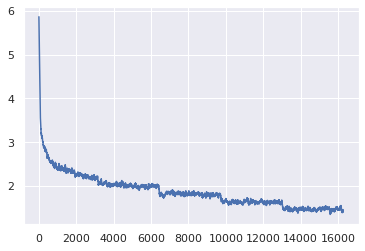

In [115]:
#Grap the loss

window_size = 50
smoothed_losses = []
for i in range(len(losses)-window_size):
  smoothed_losses.append(np.mean(losses[i:i+window_size]))

plt.plot(smoothed_losses[100:])

In [116]:
import os
# Saving the model after training
output_dir="./drive/MyDrive"
path = os.path.join(output_dir, "model_files")
model.save_pretrained(path)
tokenizer.save_pretrained(path)

print(f"""[Model] Model saved @ {os.path.join(output_dir, "model_files")}\n""")

[Model] Model saved @ ./drive/MyDrive/model_files



## Manual Testing
REVISAR TRUNCADO PARA OBTENER RESULTADOS MAS LARGOS

In [121]:
test_sentence = test_dataset[0]['translation']['es']
print('Raw input text:', test_sentence)

Raw input text: Además, el aislamiento del capitán Nemo, su cambio de humor, sobre todo desde el combate con los pulpos, su taciturnidad, me hacían ver las cosas de un modo diferente y ya no sentía el entusiasmo de los primeros tiempos.


In [118]:
input_ids = encode_input_str(
    text = test_sentence,
    target_lang = 'en',
    tokenizer = tokenizer,
    seq_len = model.config.max_length,#REVISAR ACA
    lang_token_map = LANG_TOKEN_MAPPING)
input_ids = input_ids.unsqueeze(0).cuda()

print('Truncaded input text:', tokenizer.convert_tokens_to_string(
    tokenizer.convert_ids_to_tokens(input_ids[0])))

Truncaded input text: <en> Además, el aislamiento del capitán Nemo, su cambio de humor,</s>


In [119]:
output_tokens = model.generate(input_ids, num_beams = 10, num_return_sequences=3)
#print(output_tokens)
for token_set in output_tokens:
  print(tokenizer.decode(token_set, skip_special_tokens=True))

/usr/local/lib/python3.8/dist-packages/transformers/generation/utils.py:1387: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 20 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Besides, the anxiety of Captain Nemo, his change of mood, and
Besides, the anxiety of Captain Nemo, his change of moods,
Besides, the anxiety of Captain Nemo, his changing mood, and


In [120]:
#@title Translate mT5 Opues Book DataSet EN-ES
input_text = 'Hola me llamo Andr\xE9s y soy el mejor de todos' #@param {type:"string"}
output_language = 'en' #@param['en']

input_ids = encode_input_str(
    text = input_text,
    target_lang = 'en',
    tokenizer = tokenizer,
    seq_len = model.config.max_length,
    lang_token_map = LANG_TOKEN_MAPPING)
input_ids = input_ids.unsqueeze(0).cuda()

output_tokens = model.generate(input_ids, num_beams=20, length_penalty=0.2)
print(input_text + '   ->   ' + \
      tokenizer.decode(output_tokens[0],skip_special_tokens=True))

Hola me llamo Andrés y soy el mejor de todos   ->   "My name is Andrew, and I am the best of all."


#Sumarization 

In [12]:
model_repo = 't5-base'

In [13]:
summarizer = pipeline("summarization", model=model_repo, tokenizer=model_repo, framework="tf")

Downloading:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/892M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at t5-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [17]:
summary_text = summarizer(text_output, max_length=100, min_length=5, do_sample=False)[0]['summary_text']
print(summary_text)

when I get lost in your eyes, I feel my spirits rise and soar like the wind . if i can't find my way, it's salvation six worlds away .
